In [1]:

!pip install opencv-python matplotlib numpy
!pip install torch torchvision torchaudio
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install face_recognition

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-nfg0a063
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-nfg0a063
  Resolved https://github.com/facebookresearch/detectron2.git to commit a9c0821a12ad353fb2a96f019515990d5460c5ac
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.2 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6352521 sha256=4cb2a3feb5689fe002b0cbb418d564a09e6364e1078ef109b32be7f34f7738a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-megor3gn/wheels/d3/6e/bd/1969578f1456a6be


=== EXERCICE 3 : Détection d'objets avec Detectron2 ===
Uploader une image avec des objets (image_objects.jpg):


Saving image3.webp to image3.webp
Résultat détection:


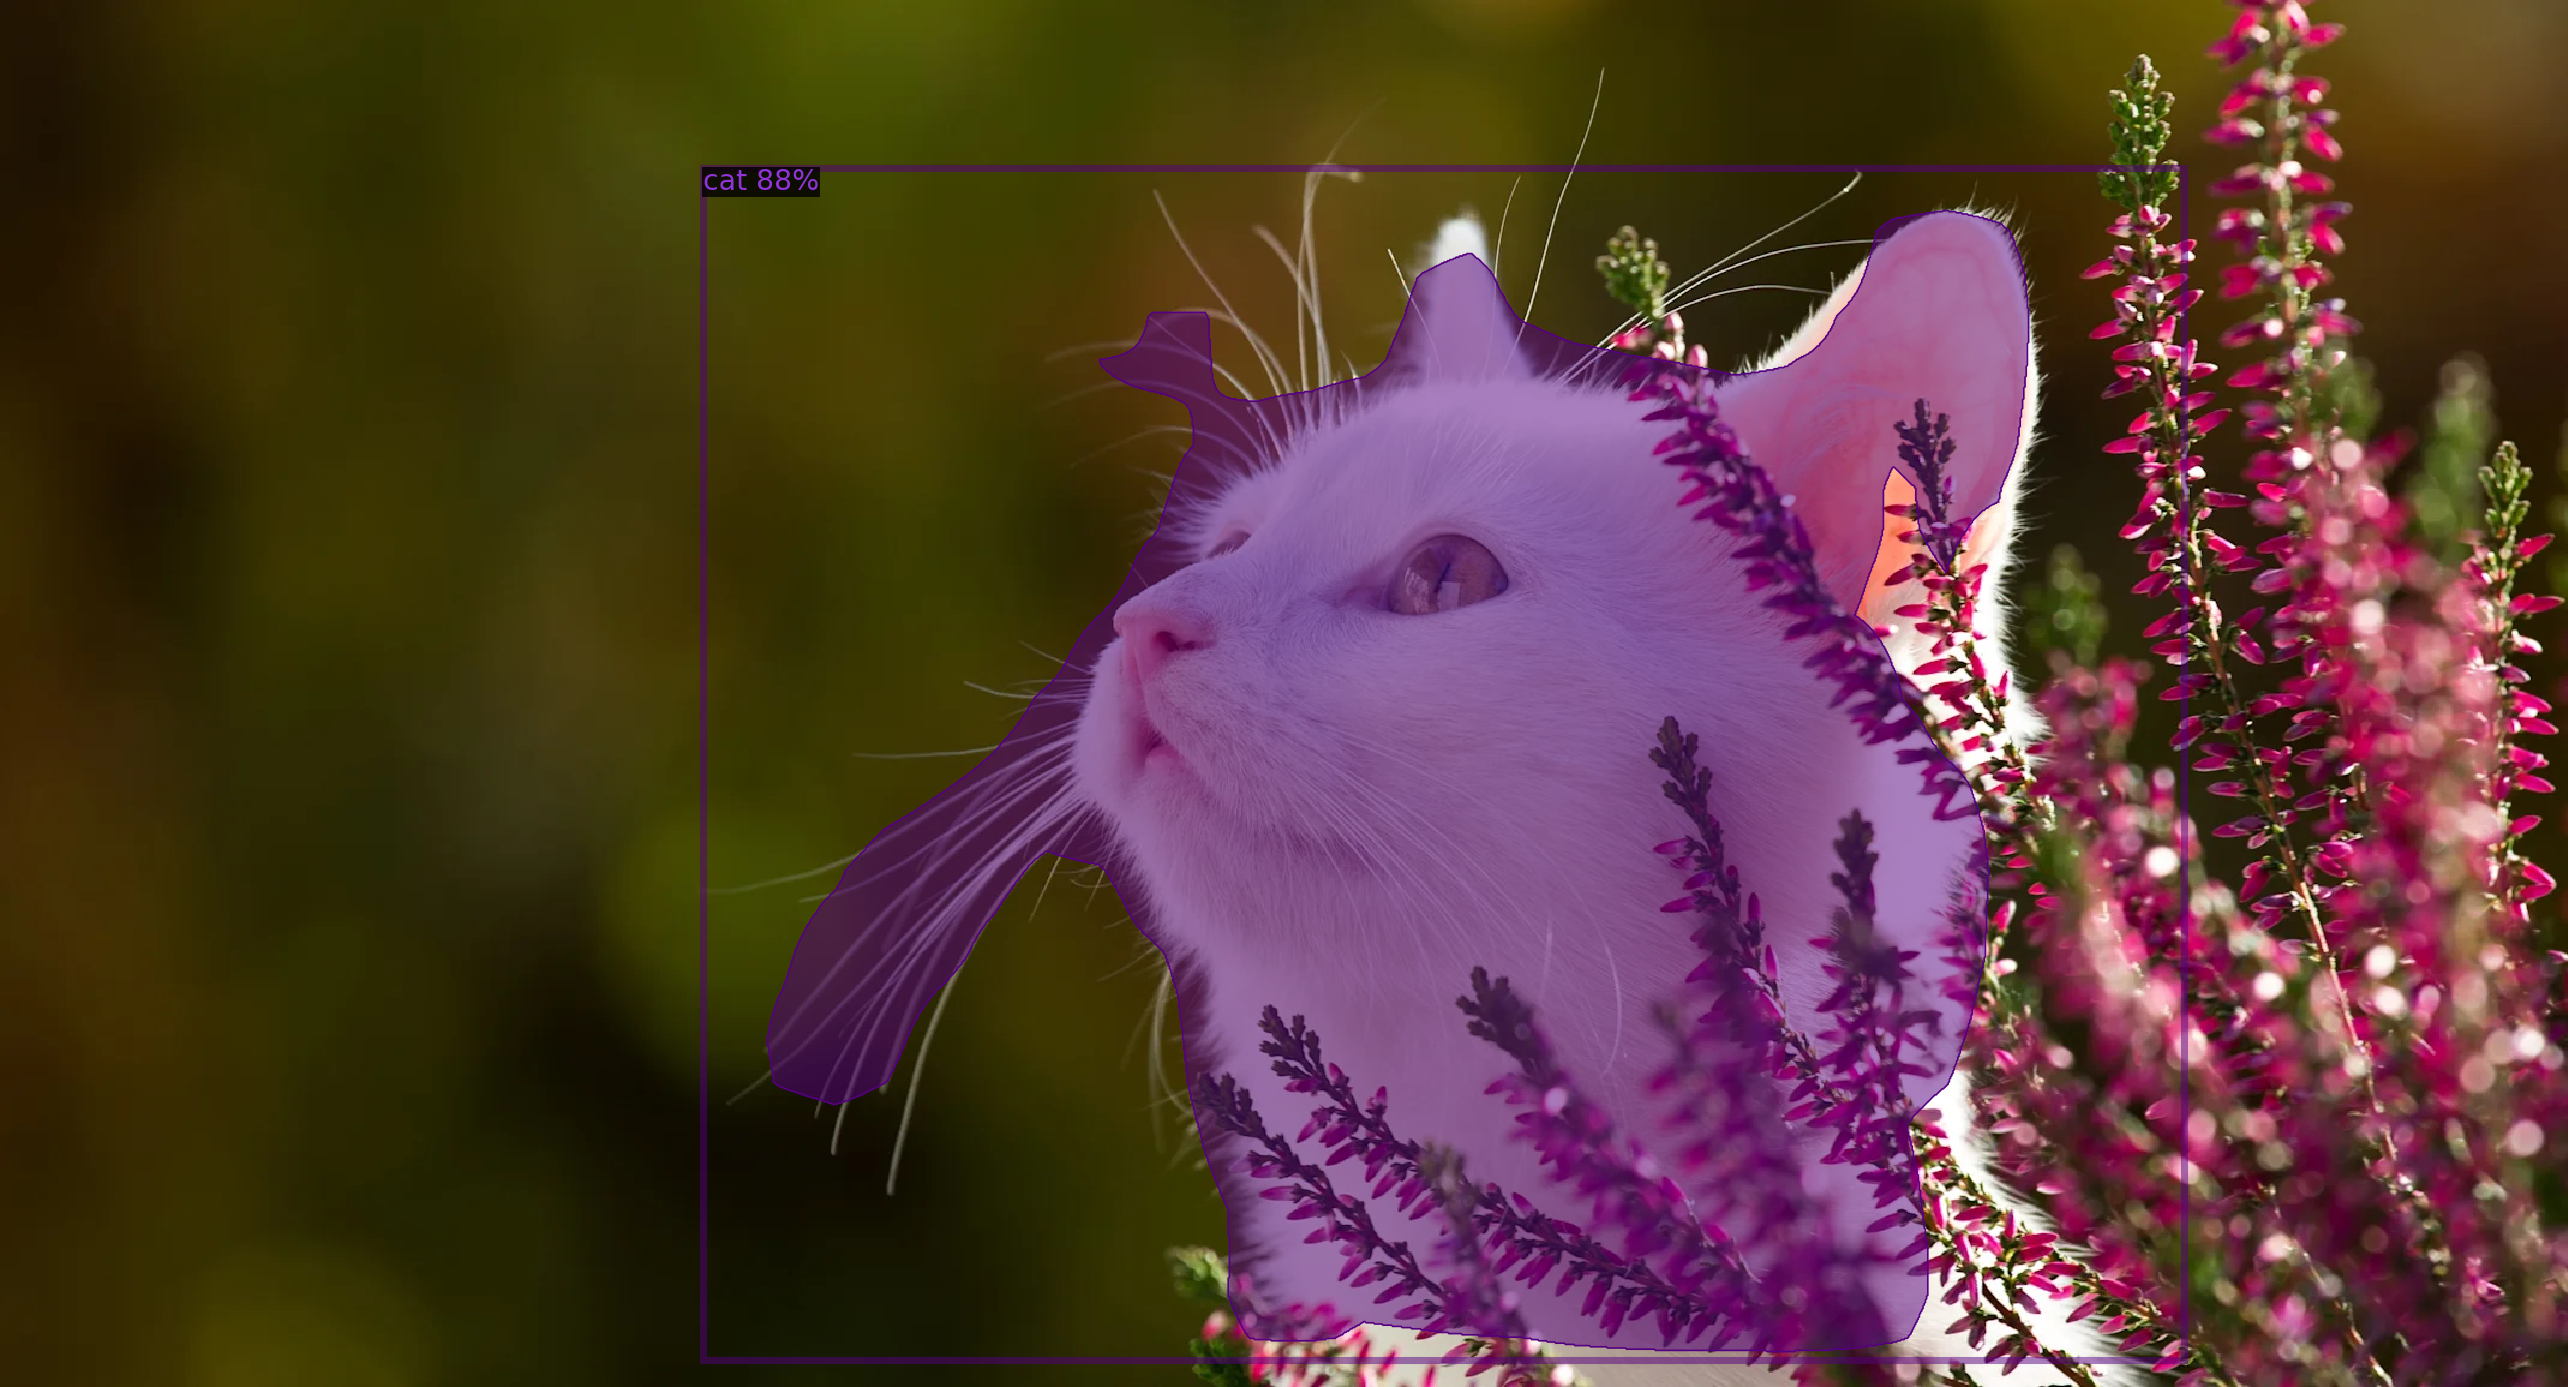

Objets détectés:
- cat: 87.7%
Total: 1 objets détectés
✓ Exercice 3 terminé
REPONSES:
1. Objets détectés: voir liste ci-dessus
2. Seuil SCORE_THRESH_TEST: bas=plus d'objets, haut=objets plus fiables


In [5]:


print("Uploader une image avec des objets (image_objects.jpg):")
uploaded = files.upload()

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

for filename in uploaded.keys():
    img = cv2.imread(filename)
    outputs = predictor(img)

    # Visualisation
    v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    print("Résultat détection:")
    cv2_imshow(out.get_image()[:, :, ::-1])

    print("Objets détectés:")
    detected = []
    for i, score in enumerate(outputs["instances"].scores):
        class_id = outputs["instances"].pred_classes[i]
        class_name = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[class_id]
        detected.append(f"{class_name} ({score:.1%})")
        print(f"- {class_name}: {score:.1%}")

    print(f"Total: {len(detected)} objets détectés")


=== EXERCICE 1 : Analyse d'une image ===


Saving image1.jpg to image1.jpg
Image originale:


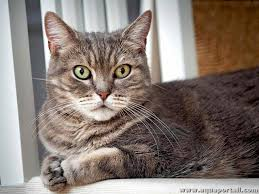

Image en niveaux de gris:


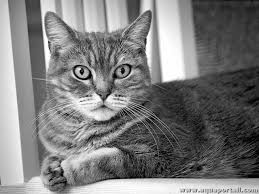

Détection de contours:


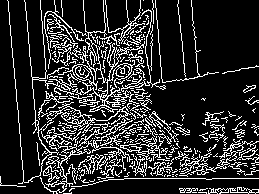

REPONSE: Matrice = valeurs pixels, Conversion gris = réduction complexité


In [2]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files


uploaded = files.upload()

for filename in uploaded.keys():
    img = cv2.imread(filename)

    print("Image originale:")
    cv2_imshow(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("Image en niveaux de gris:")
    cv2_imshow(gray)

    edges = cv2.Canny(img, 100, 200)
    print("Détection de contours:")
    cv2_imshow(edges)


In [32]:
#exercice2
import cv2

cap = cv2.VideoCapture('video2.mp4')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('Webcam - Couleur', frame)
    cv2.imshow('Webcam - Niveaux de Gris', gray)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

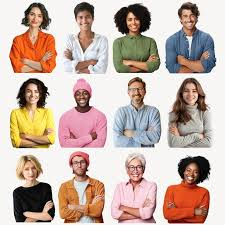

In [25]:
import dlib
import cv2
detector = dlib.get_frontal_face_detector()
img = cv2.imread("image4.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)
for face in faces:
  x, y, w, h = face.left(), face.top(), face.width(), face.height()
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  cv2.imshow("Visages détectés", img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [26]:
!apt-get install -y cmake libopenblas-dev liblapack-dev

!pip install dlib face_recognition

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libopenblas-dev is already the newest version (0.3.20+ds-1).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [33]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

def compare_faces(ref_image_path, test_image_path):

    image_ref = face_recognition.load_image_file(ref_image_path)
    image_test = face_recognition.load_image_file(test_image_path)

    encodages_ref = face_recognition.face_encodings(image_ref)
    encodages_test = face_recognition.face_encodings(image_test)

    if not encodages_ref:
        print("Aucun visage détecté dans l'image de référence")
        return

    if not encodages_test:
        print("Aucun visage détecté dans l'image test")
        return

    encodage_ref = encodages_ref[0]

    for i, encodage_test in enumerate(encodages_test):
        result = face_recognition.compare_faces([encodage_ref], encodage_test)
        distance = face_recognition.face_distance([encodage_ref], encodage_test)[0]

        print(f"Visage {i+1}: Même personne ? {result[0]} (distance: {distance:.4f})")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].imshow(image_ref)
    axes[0].set_title('Image de Référence')
    axes[0].axis('off')

    axes[1].imshow(image_test)
    axes[1].set_title('Image Test')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


compare_faces("image4.jpg", "image4.jpg")

RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /root/.cache/uv/sdists-v9/pypi/dlib/19.24.6/n0wadgr9kiz4FhGnh4jvB/src/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version